In [1]:
#%load_ext autoreload
#%autoreload 2

import numpy as np

from utilities.classes import *
from utilities.general import FPS
from utilities.plotting import plot_regression, plot_projection
from utilities.kernels import center_kernel
from matplotlib import pyplot as plt

from utilities.kernels import linear_kernel, gaussian_kernel

In /home/helfrech/.config/matplotlib/stylelib/cosmo.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/helfrech/.config/matplotlib/stylelib/cosmoLarge.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
training = np.load('../KernelPCovR/analysis/workspace/44510f9e5dec42b711c1467f03f7e504/training.npz')
testing = np.load('../KernelPCovR/analysis/workspace/44510f9e5dec42b711c1467f03f7e504/testing.npz')

In [3]:
X = training["X"][:2000] * training['Xs'] + training['Xc']
Y = training["Y"][:2000] * training['Ys'] + training['Yc']
Xt = testing["X"][:2000] * testing['Xs'] + testing['Xc'] # Same as training
Yt = testing["Y"][:2000] * testing['Ys'] + testing['Yc'] # Same as training

fps, _ = FPS(X.T, 200)
X = X[:, fps]
Xt = Xt[:, fps]

# Mess with some shit
#X += np.random.uniform(-0.5, 0.5, X.shape[1])
#Y += np.random.uniform(-0.5, 0.5, Y.shape[1])

#Xt += np.random.uniform(-0.5, 0.5, Xt.shape[1])
#Yt += np.random.uniform(-0.5, 0.5, Yt.shape[1])

In [4]:
scp = {"linewidth": 0.5, "edgecolor":"k", "cbar": False}

In [5]:
pca_uncentered = PCA(n_PC=2, scale=False, center=False)
pca_uncentered.fit(X)

pca_centered = PCA(n_PC=2, scale=True, center=True)
pca_centered.fit(X)

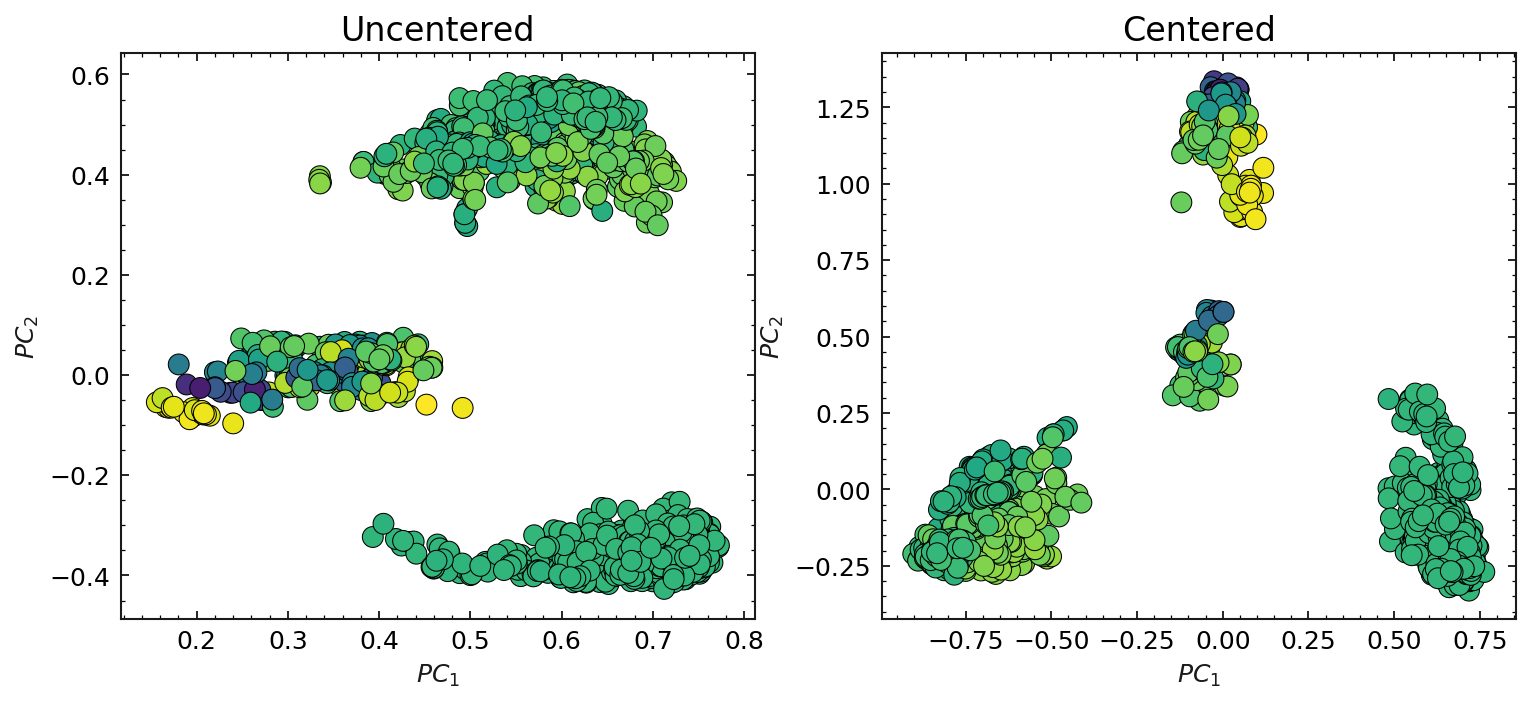

In [6]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
plot_projection(Yt, pca_uncentered.transform(Xt), 
                fig=fig, title='Uncentered', ax=ax[0], **scp)
plot_projection(Yt, pca_centered.transform(Xt), 
                fig=fig, title='Centered', ax=ax[1], **scp)

In [7]:
lr_centered = LR(center=True, scale=True, regularization=1.0E-15)
lr_centered.fit(X, Y)
print('finished centered fit')

lr_uncentered = LR(center=False, scale=False, regularization=1.0E-15)
lr_uncentered.fit(X, Y)
print('finished uncentered fit')

finished centered fit
finished uncentered fit


Only plotting first column of Y
done with uncentered
Only plotting first column of Y
done with centered


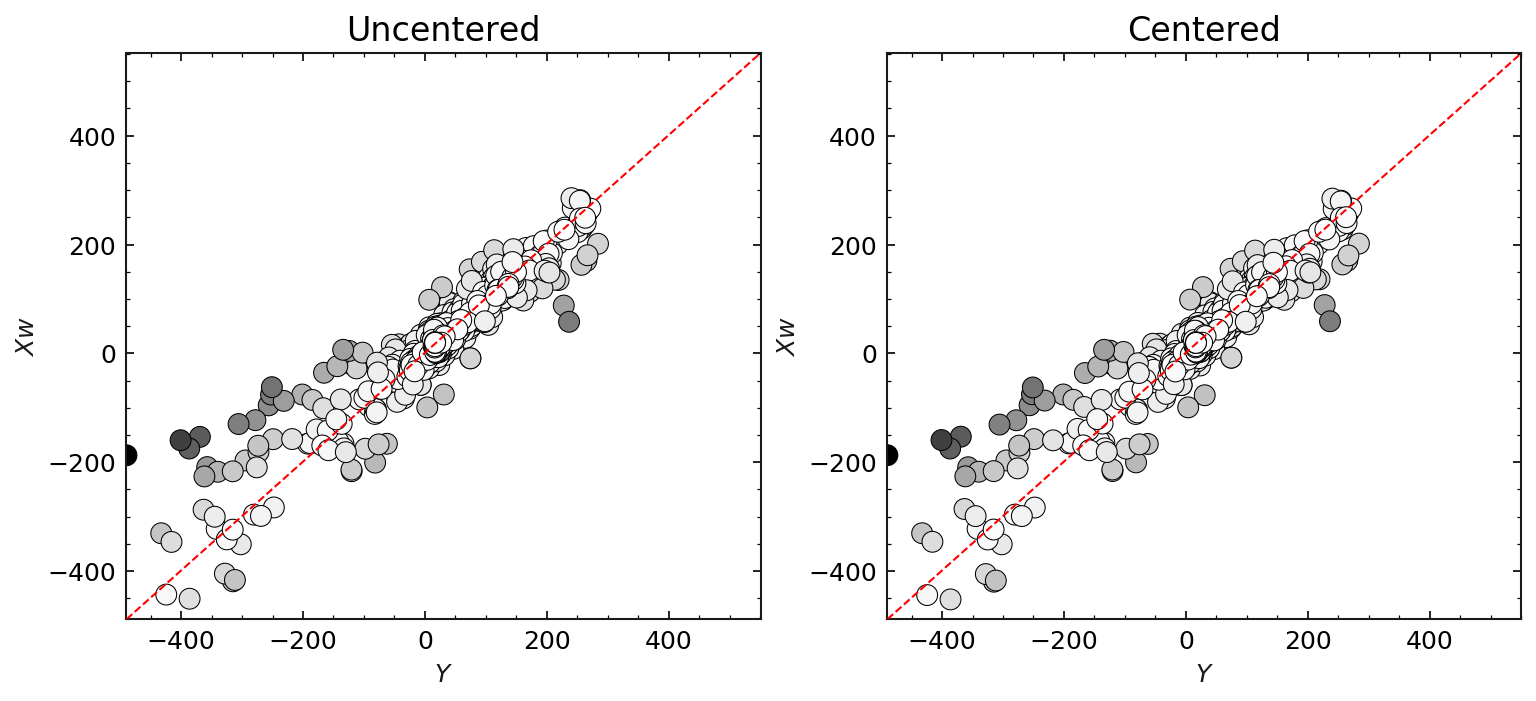

In [8]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
plot_regression(Yt, lr_uncentered.transform(Xt), 
                fig=fig, title='Uncentered', ax=ax[0], **scp)
print('done with uncentered')
plot_regression(Yt, lr_centered.transform(Xt), 
                fig=fig, title='Centered', ax=ax[1], **scp)
print('done with centered')

In [9]:
#K = linear_kernel(X, X)
#Kt = linear_kernel(Xt, X)
K = gaussian_kernel(X, X)
Kt = gaussian_kernel(Xt, X)

In [10]:
kpca_uncentered = KPCA(n_PC=2, kernel_type='linear', scale=False, center=False)
kpca_uncentered.fit(K=K)

kpca_centered = KPCA(n_PC=2, kernel_type='linear', scale=True, center=True)
kpca_centered.fit(K=K)

No input data supplied during fitting. 
Transformations/statistics only available for kernel inputs.
No input data supplied during fitting. 
Transformations/statistics only available for kernel inputs.


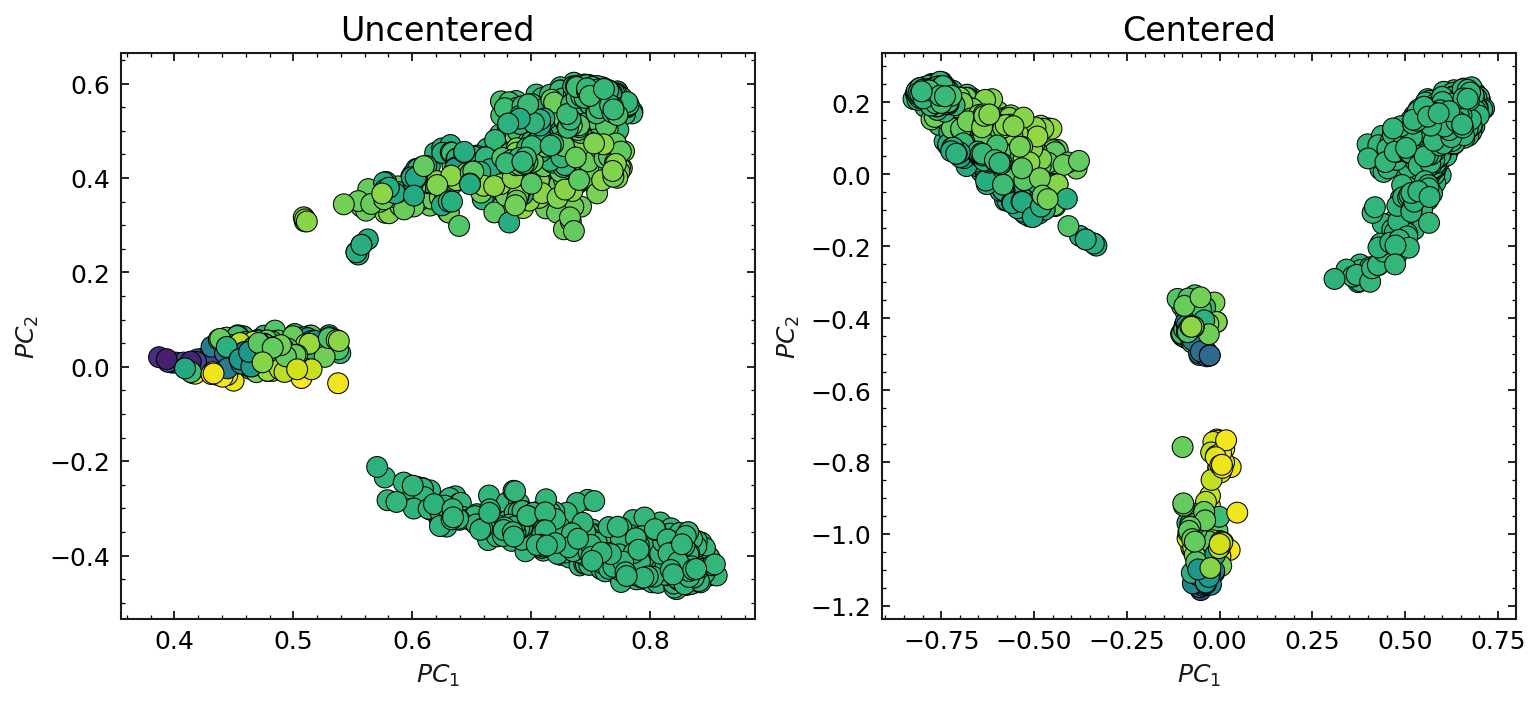

In [11]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
plot_projection(Yt, kpca_uncentered.transform(K=Kt), 
                fig=fig, title='Uncentered', ax=ax[0], **scp)
plot_projection(Yt, kpca_centered.transform(K=Kt), 
                fig=fig, title='Centered', ax=ax[1], **scp)

In [12]:
krr_centered = KRR(kernel_type='linear', center=True, scale=True)
krr_centered.fit(K=K, Y=Y)

krr_uncentered = KRR(kernel_type='linear', center=False, scale=False)
krr_uncentered.fit(K=K, Y=Y)

No input data supplied during fitting. 
Transformations/statistics only available for kernel inputs.
No input data supplied during fitting. 
Transformations/statistics only available for kernel inputs.


Only plotting first column of Y
Only plotting first column of Y


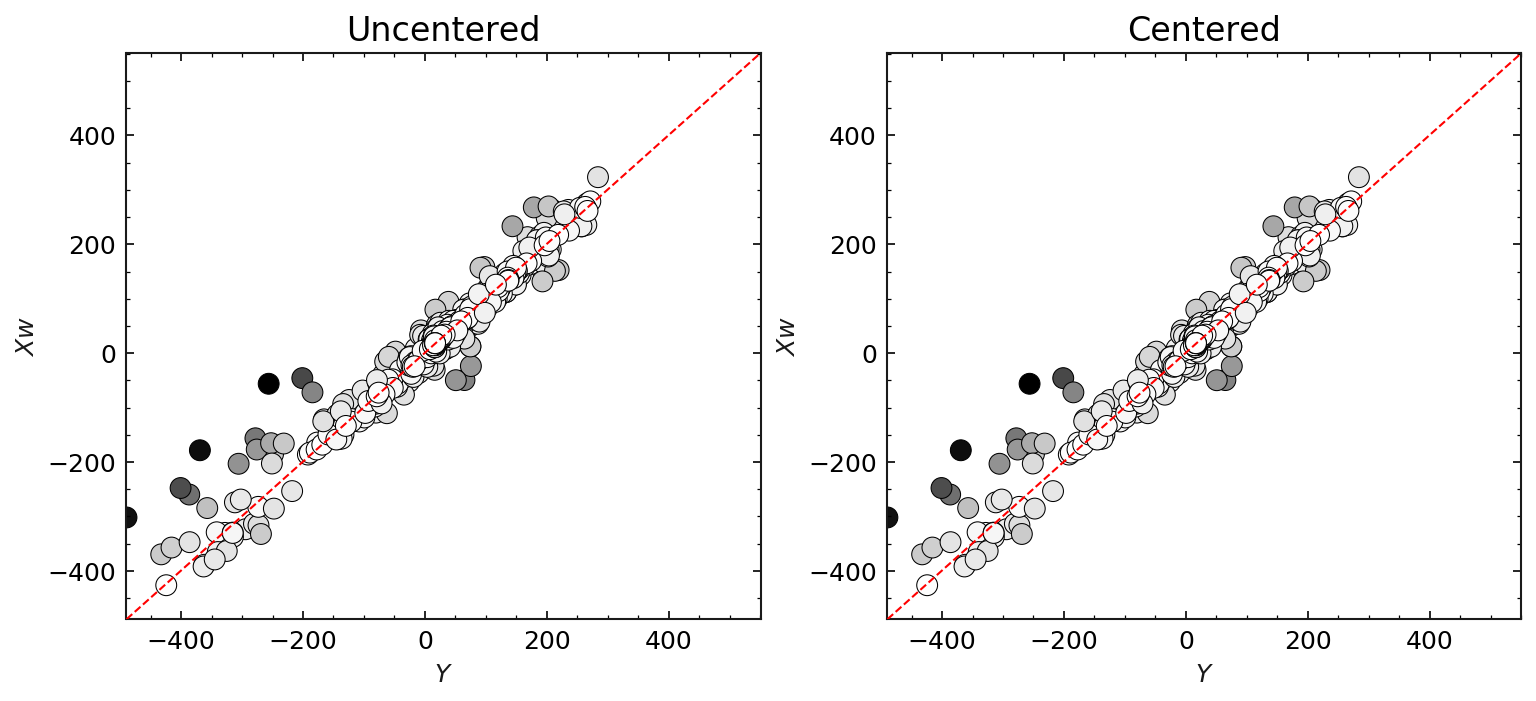

In [13]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
plot_regression(Yt, krr_uncentered.transform(K=Kt), 
                fig=fig, title='Uncentered', ax=ax[0], **scp)
plot_regression(Yt, krr_centered.transform(K=Kt), 
                fig=fig, title='Centered', ax=ax[1], **scp)

In [14]:
n_active = 50
fps_sparse, _ = FPS(X, n_active)
X_sparse = X[fps_sparse]

In [15]:
#Knm = linear_kernel(X, X_sparse)
#Knmt = linear_kernel(Xt, X_sparse)
#Kmm = linear_kernel(X_sparse, X_sparse)
Knm = gaussian_kernel(X, X_sparse)
Knmt = gaussian_kernel(Xt, X_sparse)
Kmm = gaussian_kernel(X_sparse, X_sparse)

In [16]:
skpca_uncentered = SparseKPCA(kernel_type='linear', n_PC=2, n_active=n_active,
                              scale=False, center=False)
skpca_uncentered.fit(X=X, Knm=Knm, Kmm=Kmm)

skpca_centered = SparseKPCA(kernel_type='linear', n_PC=2, n_active=n_active,
                            scale=True, center=True)
skpca_centered.fit(X=X, Knm=Knm, Kmm=Kmm)

/home/helfrech/ENVIRONMENTS/KPCOVR/lib/python3.6/site-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:1260: RuntimeWarning: k >= N - 1 for N * N square matrix. Attempting to use scipy.linalg.eig instead.
  RuntimeWarning)


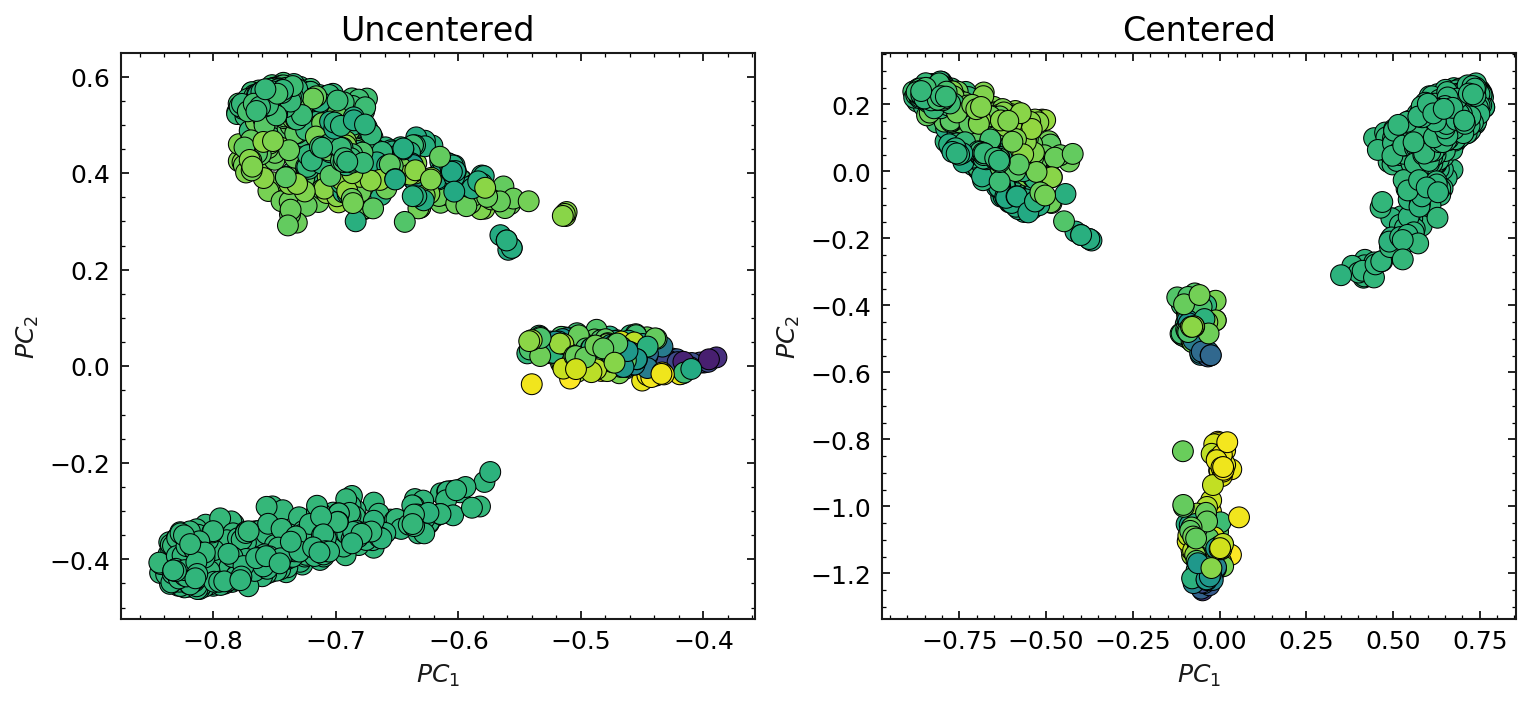

In [17]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
plot_projection(Yt, skpca_uncentered.transform(X=Xt, Knm=Knmt), 
                fig=fig, title='Uncentered', ax=ax[0], **scp)
plot_projection(Yt, skpca_centered.transform(X=Xt, Knm=Knmt), 
                fig=fig, title='Centered', ax=ax[1], **scp)

In [18]:
skrr_centered = SparseKRR(kernel_type='linear', n_active=n_active,center=True, scale=True)
skrr_centered.fit(X=X, Knm=Knm, Kmm=Kmm, Y=Y)

skrr_uncentered = SparseKRR(kernel_type='linear', n_active=n_active, center=False, scale=False)
skrr_uncentered.fit(X=X, Knm=Knm, Kmm=Kmm, Y=Y)

Only plotting first column of Y
Only plotting first column of Y


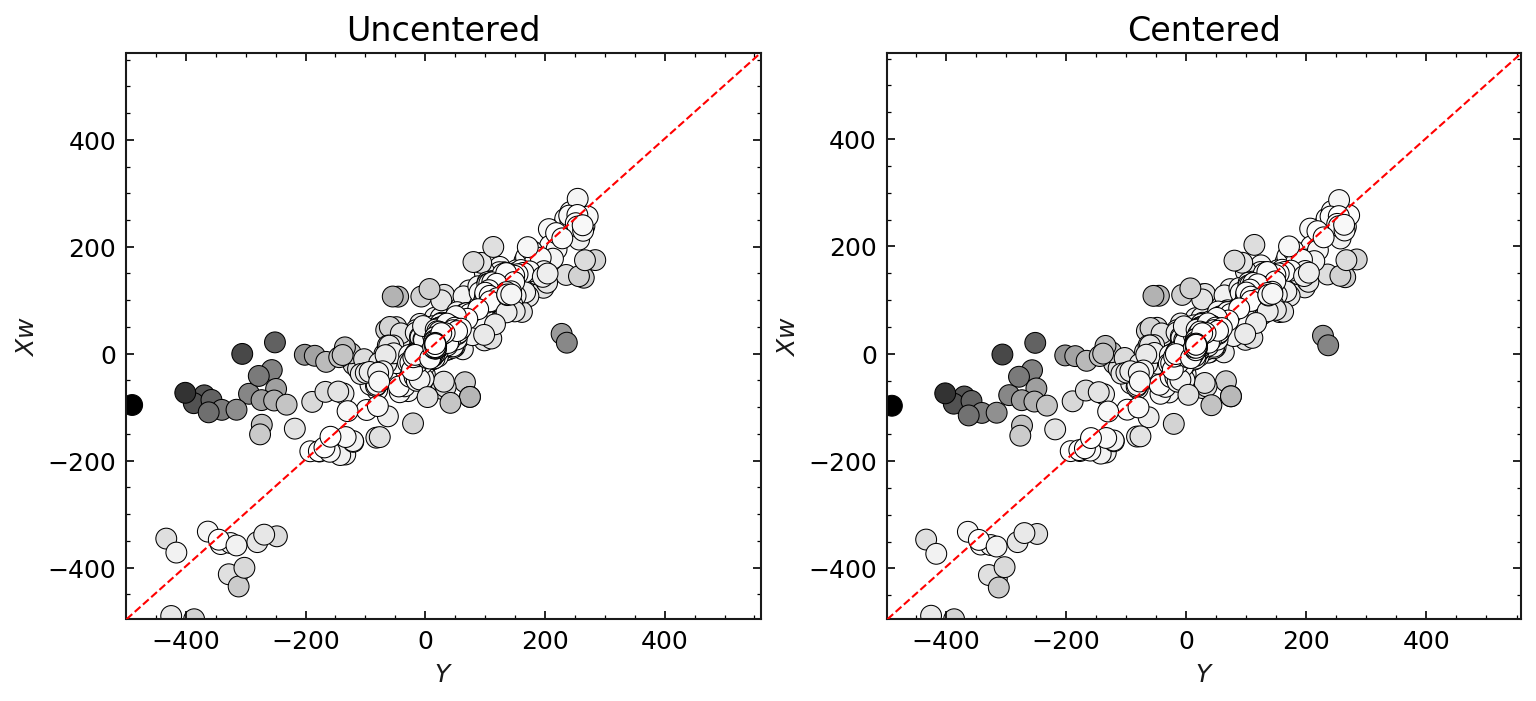

In [19]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
plot_regression(Yt, skrr_uncentered.transform(X=Xt, Knm=Knmt), 
                fig=fig, title='Uncentered', ax=ax[0], **scp)
plot_regression(Yt, skrr_centered.transform(X=Xt, Knm=Knmt), 
                fig=fig, title='Centered', ax=ax[1], **scp)

In [20]:
alpha = 1.0

In [21]:
PCovR_uncentered = PCovR(alpha=alpha, n_PC=2, scale=False, center=False)
PCovR_uncentered.fit(X, Y)

PCovR_centered = PCovR(alpha=alpha, n_PC=2, scale=True, center=True)
PCovR_centered.fit(X, Y)

# samples > # features, computing in feature space
# samples > # features, computing in feature space


Only plotting first column of Y
Only plotting first column of Y


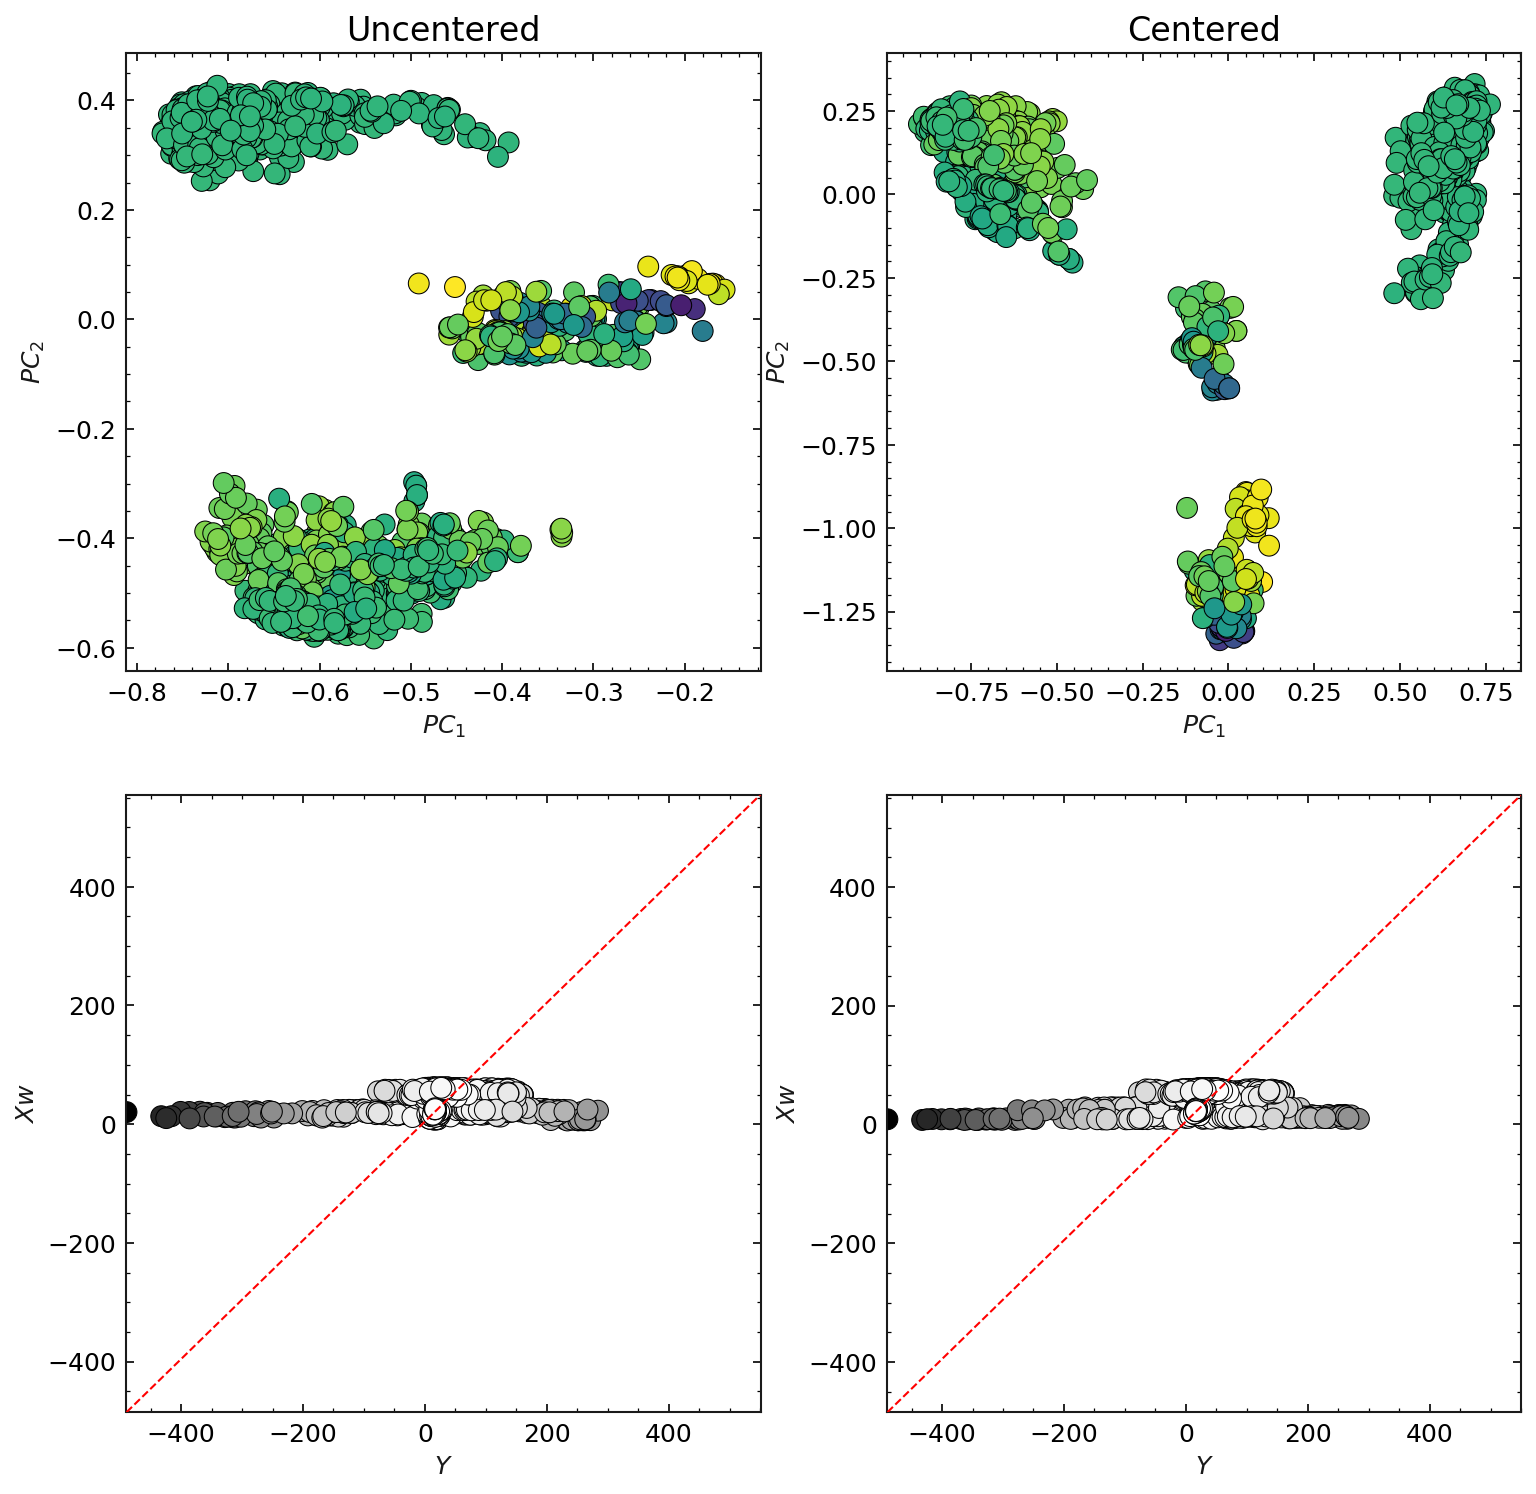

In [22]:
T_unc, Yp_unc, Xr_unc = PCovR_uncentered.transform(Xt)
T_c, Yp_c, Xr_c = PCovR_centered.transform(Xt)


fig, ax = plt.subplots(2,2, figsize=(12,12))
plot_projection(Yt, T_unc, 
                fig=fig, title='Uncentered', ax=ax[0][0], **scp)
plot_projection(Yt, T_c,
                fig=fig, title='Centered', ax=ax[0][1], **scp)
plot_regression(Yt, Yp_unc, 
                fig=fig, ax=ax[1][0], **scp)
plot_regression(Yt, Yp_c,
                fig=fig, ax=ax[1][1], **scp)

In [23]:
KPCovR_uncentered = KPCovR(kernel_type='linear', alpha=alpha, n_PC=2, scale=False, center=False, regularization=1.0E-15)
KPCovR_uncentered.fit(X, Y, K=K)

KPCovR_centered = KPCovR(kernel_type='linear', alpha=alpha, n_PC=2, scale=True, center=True)
KPCovR_centered.fit(X, Y, K=K)

Only plotting first column of Y
Only plotting first column of Y


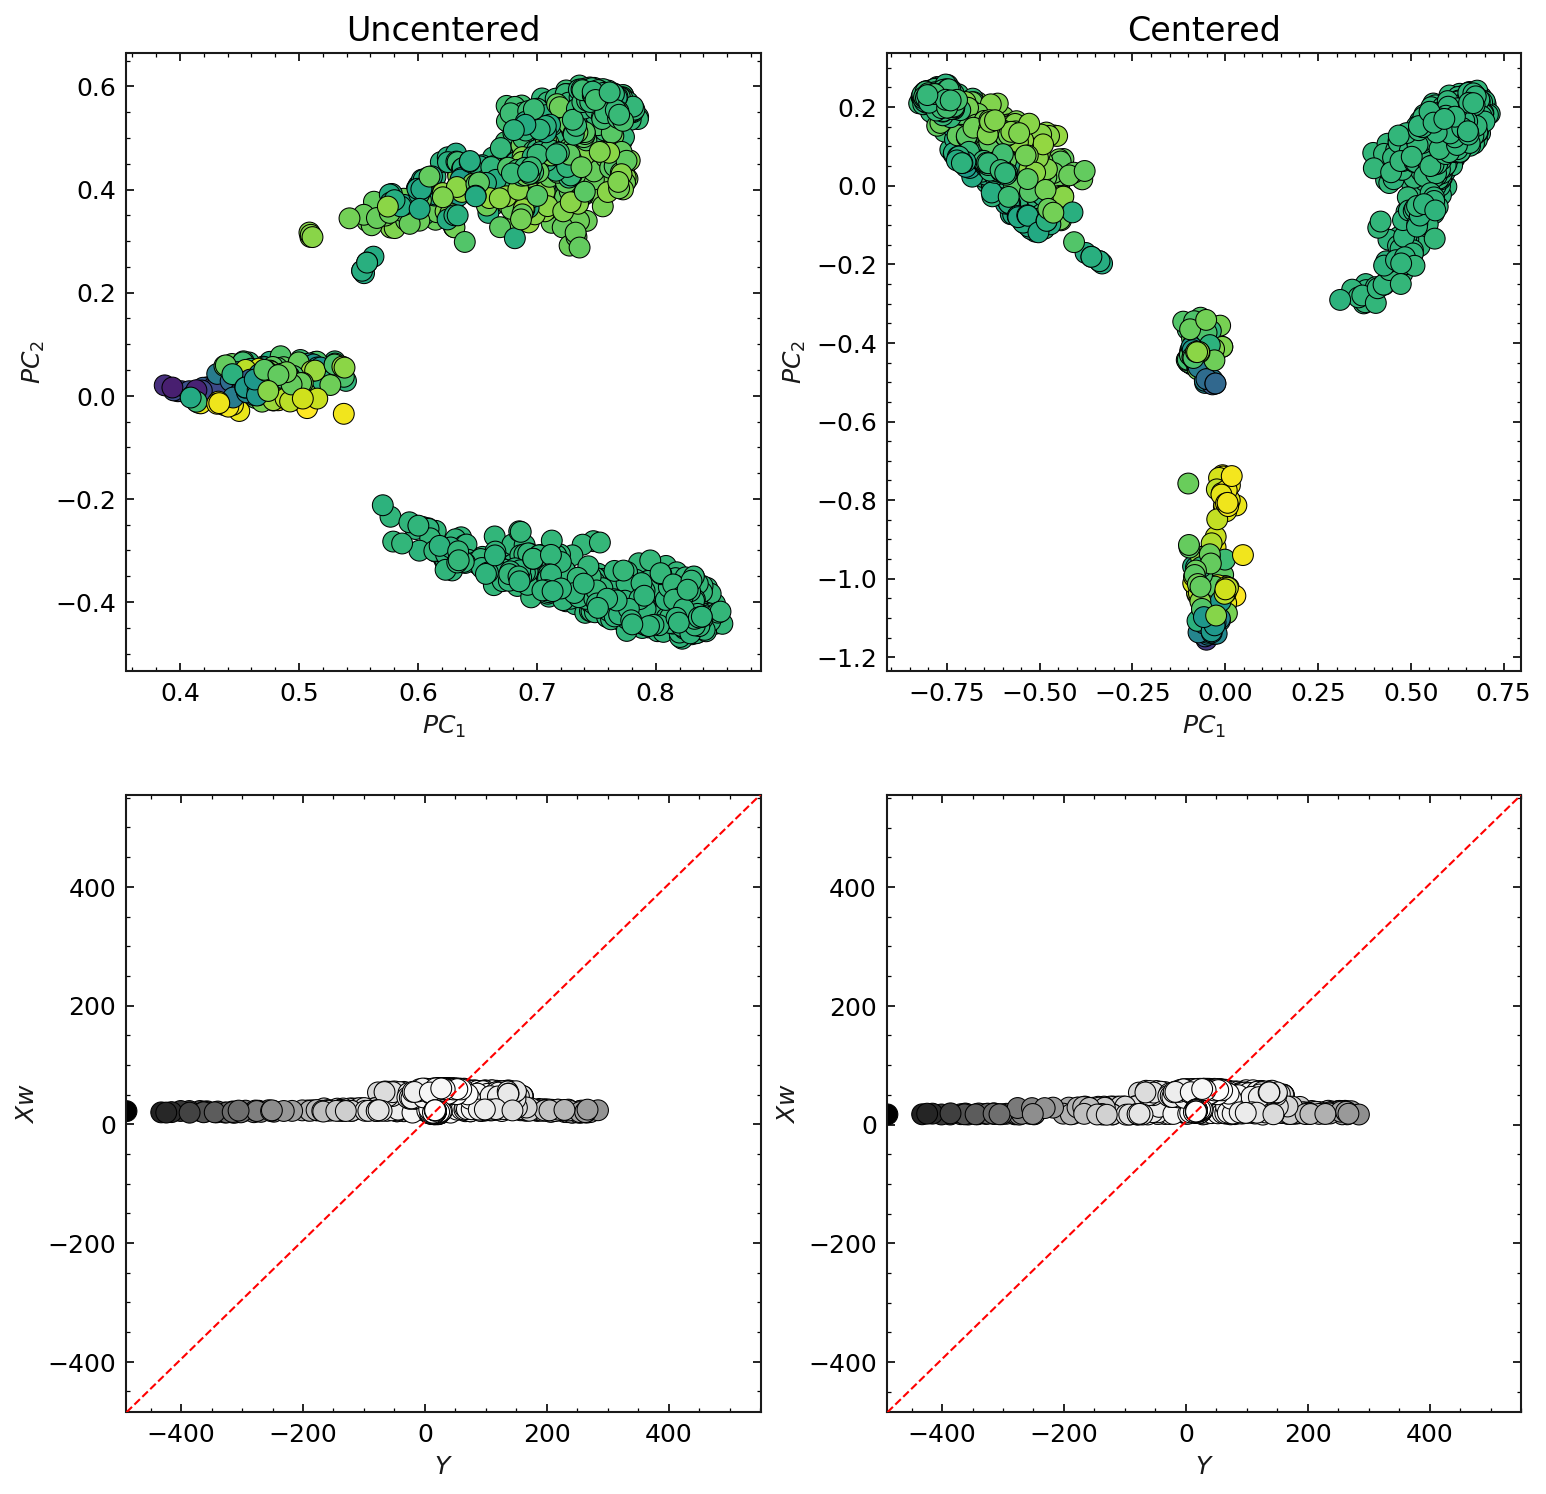

In [24]:
T_unc, Yp_unc, Xr_unc = KPCovR_uncentered.transform(K=Kt)
T_c, Yp_c, Xr_c = KPCovR_centered.transform(K=Kt)


fig, ax = plt.subplots(2,2, figsize=(12,12))
plot_projection(Yt, T_unc, 
                fig=fig, title='Uncentered', ax=ax[0][0], **scp)
plot_projection(Yt, T_c,
                fig=fig, title='Centered', ax=ax[0][1], **scp)
plot_regression(Yt, Yp_unc, 
                fig=fig, ax=ax[1][0], **scp)
plot_regression(Yt, Yp_c,
                fig=fig, ax=ax[1][1], **scp)

In [25]:
skpcovr_uncentered = SparseKPCovR(kernel_type='linear', alpha=alpha, n_PC=2, 
                                 n_active=n_active,
                                 scale=False, center=False)
skpcovr_uncentered.fit(X, Y, Knm=Knm, Kmm=Kmm)

skpcovr_centered = SparseKPCovR(kernel_type='linear', alpha=alpha, n_PC=2, 
                                 n_active=n_active,
                               scale=True, center=True)
skpcovr_centered.fit(X, Y, Knm=Knm, Kmm=Kmm)

Only plotting first column of Y
Only plotting first column of Y


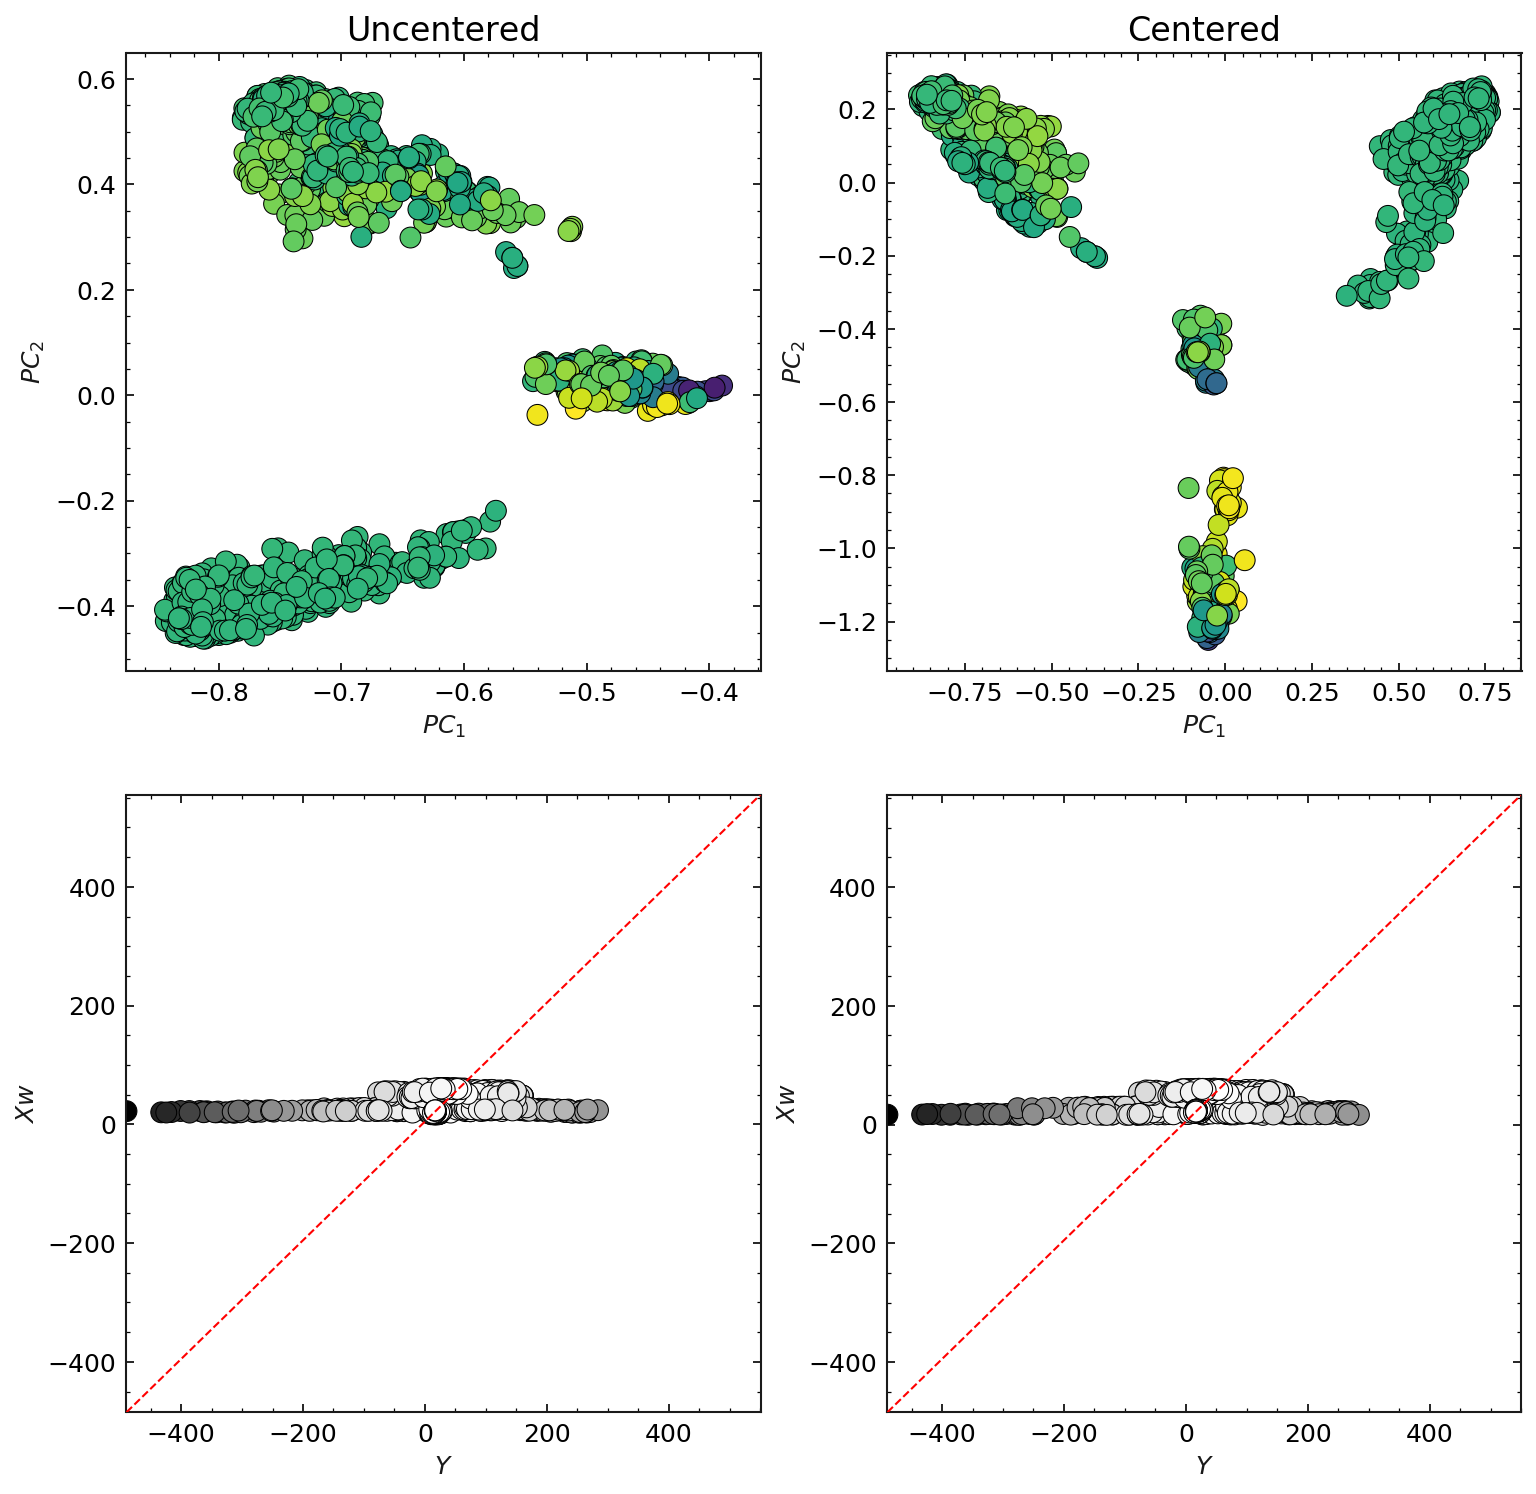

In [26]:
T_unc, Yp_unc, Xr_unc = skpcovr_uncentered.transform(X=Xt, Knm=Knmt)
T_c, Yp_c, Xr_c = skpcovr_centered.transform(X=Xt, Knm=Knmt)


fig, ax = plt.subplots(2,2, figsize=(12,12))
plot_projection(Yt, T_unc, 
                fig=fig, title='Uncentered', ax=ax[0][0], **scp)
plot_projection(Yt, T_c,
                fig=fig, title='Centered', ax=ax[0][1], **scp)
plot_regression(Yt, Yp_unc, 
                fig=fig, ax=ax[1][0], **scp)
plot_regression(Yt, Yp_c,
                fig=fig, ax=ax[1][1], **scp)

In [27]:
# Check centering of Kmm
Knm = gaussian_kernel(X, X_sparse)
Kmnt = gaussian_kernel(Xt, X_sparse)
Kmm = gaussian_kernel(X_sparse, X_sparse)
Kmmc = center_kernel(Kmm)/1.0E5
Kmmcc = Kmm - np.mean(Knm, axis=0)

In [28]:
print(np.linalg.pinv(Kmm))
print(np.linalg.pinv(Kmmc))

[[ 6.65932286  0.06661838  0.2698208  ...  0.0895155  -3.39436639
  -0.21721127]
 [ 0.06661838  2.71722215 -0.02677523 ...  0.01859147  0.01517025
   0.16079408]
 [ 0.2698208  -0.02677523  2.55625444 ...  0.09045251  0.07174813
   0.06248554]
 ...
 [ 0.0895155   0.01859147  0.09045251 ...  5.56722782  0.45155142
   0.4597782 ]
 [-3.39436639  0.01517025  0.07174813 ...  0.45155142  7.56966905
   0.10906162]
 [-0.21721127  0.16079408  0.06248554 ...  0.4597782   0.10906162
   6.75719101]]
[[ 663976.5411622     8474.71901389   30410.59567062 ...    7978.91687759
  -339049.87182447  -23279.52136309]
 [   8474.7190139   270041.76216597   -5855.59138674 ...    2760.73096677
     1158.51018784   17523.96369573]
 [  30410.59567062   -5855.59138674  249615.08967763 ...   10750.32347966
     6496.79100706    8980.49462493]
 ...
 [   7978.9168776     2760.73096677   10750.32347966 ...  556239.07142322
    45347.48951885   45202.79753082]
 [-339049.87182447    1158.51018784    6496.79100706 ...   

In [29]:
print(np.linalg.eigvalsh(Kmm))
print(np.linalg.eigvalsh(Kmmc))

[ 0.06726358  0.07486901  0.09381267  0.10278008  0.10901503  0.11316122
  0.11538173  0.12275074  0.12626792  0.13759056  0.14302409  0.14664998
  0.15168381  0.15614231  0.16325463  0.16957084  0.1768146   0.18759378
  0.19640443  0.20376207  0.22682913  0.23485925  0.25270795  0.27047799
  0.27465019  0.28449199  0.29834751  0.3155241   0.3585091   0.36586922
  0.40107297  0.41447066  0.44209431  0.48275865  0.54483802  0.55447706
  0.57381046  0.65988176  0.69384713  0.72513947  0.7282054   0.94438917
  1.04509366  1.37965646  1.57840071  1.63961507  2.77693197  3.74247339
  4.98460846 20.04817569]
[-2.12247145e-20  6.72662536e-07  7.49589663e-07  9.43323534e-07
  1.02980568e-06  1.09023453e-06  1.13329072e-06  1.15437705e-06
  1.23155726e-06  1.27683914e-06  1.37591877e-06  1.43088946e-06
  1.46839360e-06  1.51761500e-06  1.56374497e-06  1.64430754e-06
  1.69571262e-06  1.76823213e-06  1.88540422e-06  1.96414680e-06
  2.04046056e-06  2.27097529e-06  2.34967813e-06  2.52962913e-06


In [30]:
skpca_uncentered_Kmm = SparseKPCA(kernel_type='linear', n_PC=2, n_active=n_active,
                              scale=True, center=True)
skpca_uncentered_Kmm.fit(X=X, Knm=Knm, Kmm=Kmm)

skpca_centered_Kmm = SparseKPCA(kernel_type='linear', n_PC=2, n_active=n_active,
                            scale=True, center=True)
skpca_centered_Kmm.fit(X=X, Knm=Knm, Kmm=Kmmc)

In [31]:
print(skpca_uncentered_Kmm.transform(X=Xt, Knm=Knmt))
print(skpca_centered_Kmm.transform(X=Xt, Knm=Knmt))

[[-0.02798391 -1.1468695 ]
 [-0.02596575 -1.14984008]
 [-0.03067275 -1.14689103]
 ...
 [ 0.70554001  0.14959124]
 [ 0.7070552   0.14228366]
 [ 0.70499248  0.15157568]]
[[ 0.02871926 -1.14694142]
 [ 0.02671493 -1.14990961]
 [ 0.03137687 -1.14690899]
 ...
 [-0.70735145  0.15110654]
 [-0.70879331  0.14372727]
 [-0.70663163  0.15289919]]


In [32]:
skrr_uncentered_Kmm = SparseKRR(kernel_type='linear', n_active=n_active, center=True, scale=True)
skrr_uncentered_Kmm.fit(X=X, Knm=Knm, Kmm=Kmm, Y=Y)

skrr_centered_Kmm = SparseKRR(kernel_type='linear', n_active=n_active,center=True, scale=True)
skrr_centered_Kmm.fit(X=X, Knm=Knm, Kmm=Kmmc, Y=Y)

In [33]:
print(skrr_uncentered_Kmm.transform(X=Xt, Knm=Knmt))
print(skrr_centered_Kmm.transform(X=Xt, Knm=Knmt))

[[-51.27753251]
 [-63.99121109]
 [-60.86690292]
 ...
 [ 18.89211739]
 [ 17.16540027]
 [ 16.69162169]]
[[-51.27753251]
 [-63.99121109]
 [-60.86690292]
 ...
 [ 18.89211739]
 [ 17.16540027]
 [ 16.69162169]]


In [34]:
skpcovr_uncentered_Kmm = SparseKPCovR(kernel_type='linear', alpha=1.0, n_PC=2, 
                                 n_active=n_active,
                                 scale=True, center=True)
skpcovr_uncentered_Kmm.fit(X, Y, Knm=Knm, Kmm=Kmm)

skpcovr_centered_Kmm = SparseKPCovR(kernel_type='linear', alpha=1.0, n_PC=2, 
                                 n_active=n_active,
                               scale=True, center=True)
skpcovr_centered_Kmm.fit(X, Y, Knm=Knm, Kmm=Kmmc)

T_unc, Yp_unc, Xr_unc = skpcovr_uncentered_Kmm.transform(X=Xt, Knm=Knmt)
T_c, Yp_c, Xr_c = skpcovr_centered_Kmm.transform(X=Xt, Knm=Knmt)

In [35]:
print(T_unc)
print(T_c)

[[-0.02798391 -1.1468695 ]
 [-0.02596575 -1.14984008]
 [-0.03067275 -1.14689103]
 ...
 [ 0.70554001  0.14959124]
 [ 0.7070552   0.14228366]
 [ 0.70499248  0.15157568]]
[[ 0.02871926 -1.14694142]
 [ 0.02671493 -1.14990961]
 [ 0.03137687 -1.14690899]
 ...
 [-0.70735145  0.15110654]
 [-0.70879331  0.14372727]
 [-0.70663163  0.15289919]]


In [36]:
print(Yp_unc)
print(Yp_c)

[[17.61227052]
 [17.51622508]
 [17.6747655 ]
 ...
 [21.79652285]
 [21.64088064]
 [21.84196953]]
[[17.64757033]
 [17.55194739]
 [17.71020984]
 ...
 [21.77993292]
 [21.62495694]
 [21.82621743]]


In [37]:
print(Xr_unc)
print(Xr_c)

[[ 0.02114151 -0.0109274  -0.02457035 ... -0.00555611  0.02668022
   0.02277392]
 [ 0.02115749 -0.01085426 -0.02561593 ... -0.00555376  0.02663506
   0.02278799]
 [ 0.02113186 -0.01167448 -0.02384029 ... -0.00556133  0.02670676
   0.02276671]
 ...
 [ 0.0200014   0.40356364 -0.00871331 ... -0.00344721  0.03034532
   0.02099982]
 [ 0.02002825  0.40278968 -0.01034423 ... -0.00344814  0.03026851
   0.0210251 ]
 [ 0.01999362  0.40373618 -0.00823329 ... -0.00344722  0.03036753
   0.02099258]]
[[ 0.02113272 -0.01094968 -0.02459225 ... -0.00555495  0.02665657
   0.02277248]
 [ 0.02114862 -0.01087951 -0.02563396 ... -0.00555263  0.02661151
   0.0227865 ]
 [ 0.02112302 -0.01167927 -0.02386203 ... -0.00556009  0.02668323
   0.0227652 ]
 ...
 [ 0.02000423  0.40427428 -0.008844   ... -0.00344377  0.03035105
   0.02099927]
 [ 0.02003098  0.40346956 -0.01046801 ... -0.00344486  0.03027419
   0.02102456]
 [ 0.0199964   0.40436758 -0.00834868 ... -0.00344422  0.03037339
   0.02099212]]
